In [2]:
import pandas as pd
import numpy as np

In [3]:
tfidf = pd.read_csv("../Data/psalms_tf-idf_model.csv")

# Displaying the first part of the matrix
tfidf.head()

,Unnamed: 0,aaron,abandon,abasement,abated,abhor,abhorred,abhors,abide,abides,...,zacharias,zalmon,zalmunna,zeal,zebah,zebulun,zeeb,zion,ziphites,zoan
0,"('Bible', 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,"('Bible', 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073732,0.0,0.0
2,"('Bible', 3)",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,"('Bible', 4)",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,"('Bible', 5)",0.0,0.0,0.0,0.0,0.0,0.0,0.159533,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


We are going to start and fix the index. To do this, we are going to bge splitting the fist column into two columns and then turn them into a multi index.

In [4]:
# Ensure the column contains actual tuples before splitting
tfidf["Unnamed: 0"] = tfidf["Unnamed: 0"].apply(eval) if isinstance(tfidf["Unnamed: 0"].iloc[0], str) else tfidf["Unnamed: 0"]

# Split into two columns
tfidf[["text", "psalm_num"]] = tfidf["Unnamed: 0"].apply(pd.Series)

# Drop the original column and set the new ones as a multi-index
tfidf = tfidf.drop(columns=["Unnamed: 0"])


In [5]:
tfidf

,aaron,abandon,abasement,abated,abhor,abhorred,abhors,abide,abides,abideth,...,zalmunna,zeal,zebah,zebulun,zeeb,zion,ziphites,zoan,text,psalm_num
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Bible,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.073732,0.0,0.0,Bible,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Bible,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Bible,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.159533,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Bible,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Psalter,146
297,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.072284,0.0,0.0,Psalter,147
298,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Psalter,148
299,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.077137,0.0,0.0,Psalter,149


We are going to reorder the columns so that the columns just made are at the beginning.

In [6]:
# Reodering Columns
# Choose the columns you want to move to the front
cols_to_move = ["text", "psalm_num"]  

# Reorder DataFrame
tfidf = tfidf[cols_to_move + [col for col in tfidf.columns if col not in cols_to_move]]

tfidf = tfidf.set_index(["text", "psalm_num"])

tfidf.head(10)

aaron  abandon  abasement  abated  abhor  abhorred    abhors  \
text  psalm_num                                                                 
Bible 1            0.0      0.0        0.0     0.0    0.0       0.0  0.000000   
      2            0.0      0.0        0.0     0.0    0.0       0.0  0.000000   
      3            0.0      0.0        0.0     0.0    0.0       0.0  0.000000   
      4            0.0      0.0        0.0     0.0    0.0       0.0  0.000000   
      5            0.0      0.0        0.0     0.0    0.0       0.0  0.159533   
      6            0.0      0.0        0.0     0.0    0.0       0.0  0.000000   
      7            0.0      0.0        0.0     0.0    0.0       0.0  0.000000   
      8            0.0      0.0        0.0     0.0    0.0       0.0  0.000000   
      9            0.0      0.0        0.0     0.0    0.0       0.0  0.000000   
      10           0.0      0.0        0.0     0.0    0.0       0.0  0.000000   

                 abide    abides  abideth  ...  zacharias  zalmon  zalmunna  \
text  psalm_num                            ...                                
Bible 1            0.0  0.000000      0.0  ...        0.0     0.0       0.0   
      2            0.0  0.000000      0.0  ...        0.0     0.0       0.0   
      3            0.0  0.000000      0.0  ...        0.0     0.0       0.0   
      4            0.0  0.000000      0.0  ...        0.0     0.0       0.0   
      5            0.0  0.000000      0.0  ...        0.0     0.0       0.0   
      6            0.0  0.000000      0.0  ...        0.0     0.0       0.0   
      7            0.0  0.000000      0.0  ...        0.0     0.0       0.0   
      8            0.0  0.000000      0.0  ...        0.0     0.0       0.0   
      9            0.0  0.060152      0.0  ...        0.0     0.0       0.0   
      10           0.0  0.000000      0.0  ...        0.0     0.0       0.0   

                 zeal  zebah  zebulun  zeeb      zion  ziphites  zoan  
text  psalm_num                                                        
Bible 1           0.0    0.0      0.0   0.0  0.000000       0.0   0.0  
      2           0.0    0.0      0.0   0.0  0.073732       0.0   0.0  
      3           0.0    0.0      0.0   0.0  0.000000       0.0   0.0  
      4           0.0    0.0      0.0   0.0  0.000000       0.0   0.0  
      5           0.0    0.0      0.0   0.0  0.000000       0.0   0.0  
      6           0.0    0.0      0.0   0.0  0.000000       0.0   0.0  
      7           0.0    0.0      0.0   0.0  0.000000       0.0   0.0  
      8           0.0    0.0      0.0   0.0  0.000000       0.0   0.0  
      9           0.0    0.0      0.0   0.0  0.056960       0.0   0.0  
      10          0.0    0.0      0.0   0.0  0.000000       0.0   0.0  

[10 rows x 3585 columns]

Now that this is taken care of, we can move on and start investigating the model. 

## Summary

The dataframe in use, epresents a *TF-IDF (Term Frequency-Inverse Document Frequency) matrix*, which is commonly used in **Natural Language Processing (NLP)** to measure the importance of words in a collection of texts. The matrix holds data from two sets of Psalms found within the **Eastern Orthodox Church**. One set of the Psalms comes from *THE PSALTER OF THE PROPHET AND KING DAVID according to the Septuagint*, and the other set comes from *The Orthodox Study Bible*. Below are details of the the rows and columns of the data. 

>### Rows
>- Each row represents one of the Psalms from either the Bible or Psalter.
>- Each column (except the index) corresponds to a unique word found in the text.
>
>### Columns
>- The values in the matrix represent the TF-IDF score of that word in a specific document.
>- A higher value means the word is more important in that document relative to the whole dataset.



In [7]:
top_n = 100  # Number of top words to extract
word_importance = np.argsort(np.asarray(tfidf).sum(axis=0))[-top_n:][::-1] 

# Extract TF-IDF scores of the top words
top_word_scores = tfidf.iloc[:, word_importance].sum(axis=0)

# Getting the words also

# Extract the column names (words) corresponding to the top words
top_words = tfidf.columns[word_importance]

# Storing all gathered data in a dataframe
top_words_df = pd.DataFrame({
    'TF-IDF Score': top_word_scores
})

# Showing a glimpse of the results
top_words_df

,TF-IDF Score
lord,37.796268
shall,29.633710
god,24.620220
thy,23.273209
thou,19.623918
...,...
pause,4.369980
save,4.277276
thine,4.259858
behold,4.249956


In [8]:
!pip install matplotlib

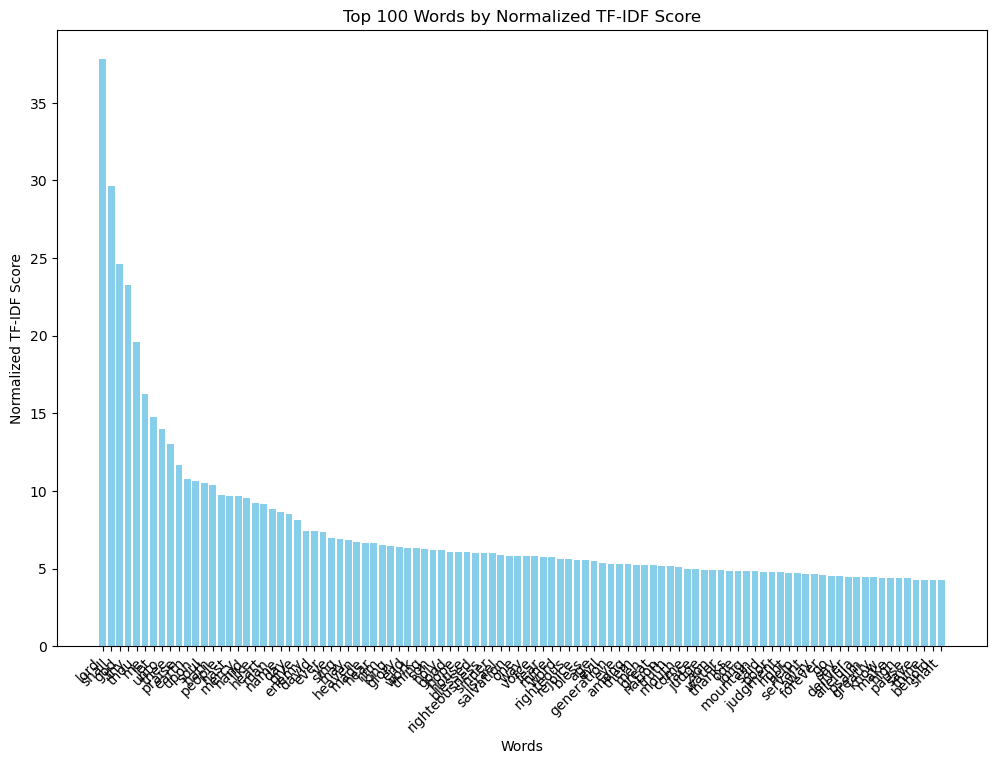

In [9]:
# Creating a visual of the Top Words
import matplotlib.pyplot as plt

# Plotting the bar chart with the top words and their TF-IDF scores
plt.figure(figsize=(12, 8))  # Optional: Adjust size of the plot
plt.bar(top_words_df.index, top_words_df['TF-IDF Score'], color='skyblue')

# Adding labels and title
plt.xlabel('Words')
plt.ylabel('Normalized TF-IDF Score')
plt.title('Top 100 Words by Normalized TF-IDF Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Rotate the x-axis labels to 45 degrees
plt.xticks(rotation=45, ha='right') 

# Show the plot
plt.show()



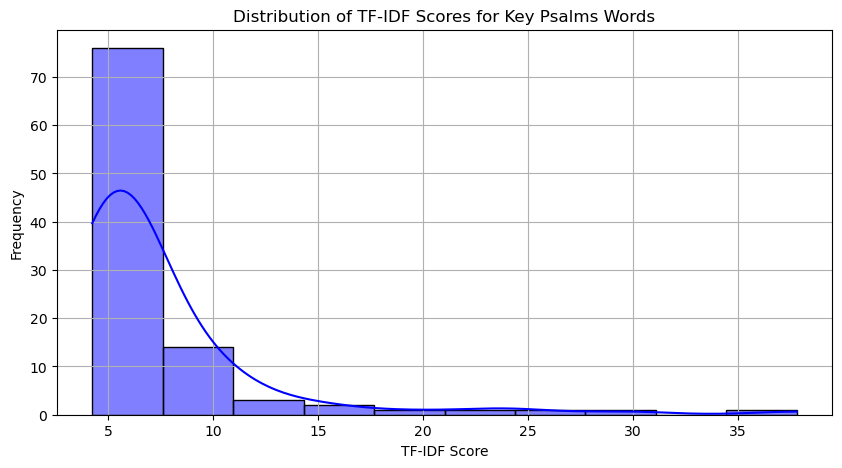

In [10]:
import seaborn as sns

top_n = 100  # Number of top words to extract
word_importance = np.argsort(np.asarray(tfidf).sum(axis=0))[-top_n:][::-1] 

# Extract TF-IDF scores of the top words
top_word_scores = tfidf.iloc[:, word_importance].sum(axis=0)

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(top_word_scores, bins=10, kde=True, color='blue')

plt.xlabel("TF-IDF Score")
plt.ylabel("Frequency")
plt.title("Distribution of TF-IDF Scores for Key Psalms Words")
plt.grid(True)

plt.show()


# Stop Words

These are words that occur in almost every document. They are not words that can be used to determine the meaningg of a document. Some of these words include, and not limited to **is**, **and**, and **the**. Within the book [Natural Language Processing with Python](https://www.nltk.org/book/), we can see see that within the `NLTK` python package, we can import a corpus of defined stop words and pull these words out of the **cleaned_verse** column of our dataframe. 

These stops words words from everyday language. Within the context of the Faith and scriptrue some of the most common words are not seen as stop words. Lets words on developing our own set of stop words and do further study. From Previous study, the lower a **TF-IDF** score is the less relevant the words becomes. In this case, a stop words is a word with minmal relevance. 

In [11]:
""" Finding metrics of TFIDF scores """

# Calculate different metrics
lowest = tfidf.min()
sum_values = tfidf.sum()
mean_values = tfidf.mean()
max_score = tfidf.max()

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Sum': sum_values,
    'Mean': mean_values,
    'Max': max_score
})

summary_df

,Sum,Mean,Max
aaron,1.295876,0.004305,0.145738
abandon,0.344434,0.001144,0.152875
abasement,0.424166,0.001409,0.424166
abated,0.062277,0.000207,0.062277
abhor,0.258725,0.000860,0.129625
...,...,...,...
zebulun,0.116809,0.000388,0.059852
zeeb,0.230566,0.000766,0.115731
zion,4.903501,0.016291,0.181403
ziphites,0.322492,0.001071,0.322492


# Graphing Playground

/tmp/ipykernel_82/2434313343.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Mean Score')


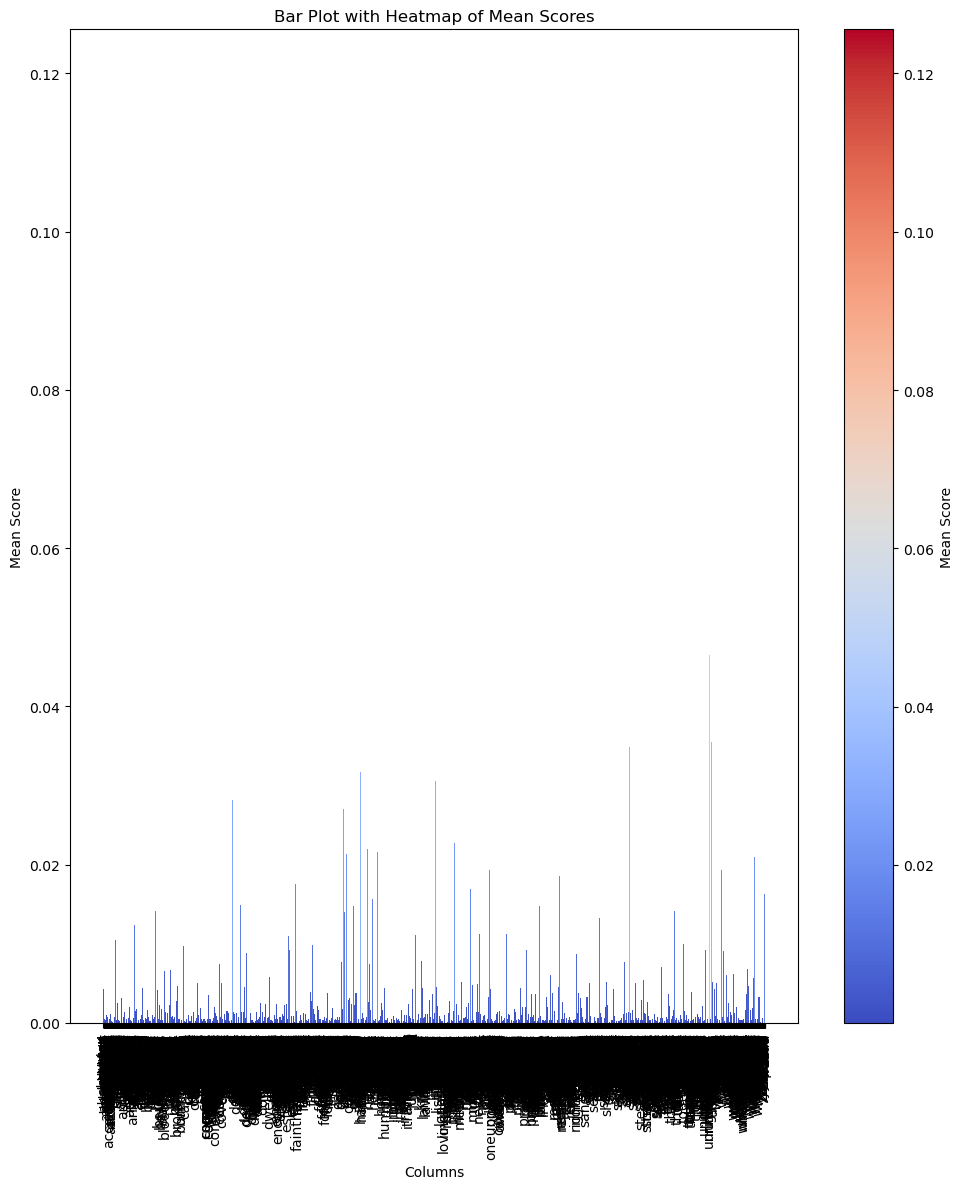

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the mean of each column
mean_values = tfidf.mean()

# Normalize the mean values to [0, 1] for color mapping
normed_mean_values = (mean_values - mean_values.min()) / (mean_values.max() - mean_values.min())

# Create a colormap
cmap = plt.get_cmap('coolwarm')

# Create a bar plot with the heatmap color effect based on mean values
plt.figure(figsize=(10, 12))
bars = plt.bar(mean_values.index, mean_values, color=cmap(normed_mean_values))

# Add colorbar to indicate the heatmap scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=mean_values.min(), vmax=mean_values.max()))
sm.set_array([])  # Empty array to avoid a warning
plt.colorbar(sm, label='Mean Score')


# Adjust the y-axis
plt.autoscale(enable=True, axis='y', tight=True)


# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Mean Score')
plt.title('Bar Plot with Heatmap of Mean Scores')

# Show the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


/tmp/ipykernel_82/3071065828.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Mean Score')


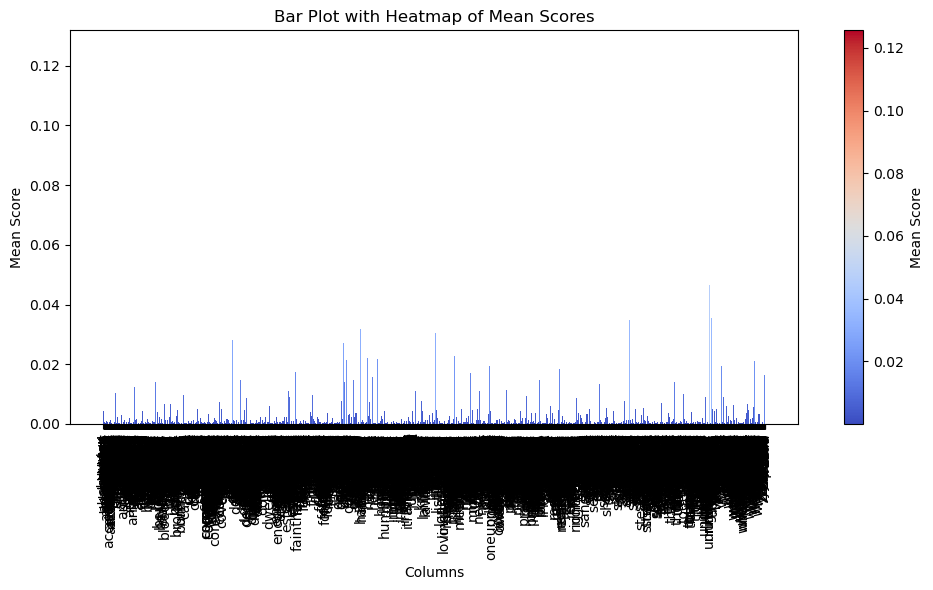

In [13]:
'''Adding a min threshold'''
# Calculate the mean of each column
mean_values = tfidf.mean()

# Normalize the mean values to [0, 1] for color mapping
normed_mean_values = (mean_values - mean_values.min()) / (mean_values.max() - mean_values.min())

# Create a colormap
cmap = plt.get_cmap('coolwarm')

# Set a minimum threshold for the y-axis (e.g., 0.1)
min_threshold = 0.015

# Create a bar plot with the heatmap color effect based on mean values
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_values.index, mean_values, color=cmap(normed_mean_values))

# Add colorbar to indicate the heatmap scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=mean_values.min(), vmax=mean_values.max()))
sm.set_array([])  # Empty array to avoid a warning
plt.colorbar(sm, label='Mean Score')

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Mean Score')
plt.title('Bar Plot with Heatmap of Mean Scores')

# Show the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


# PCA
However, based on the way you're asking, it seems you might want to clarify a few points about how these words relate to the meaning of a Psalm:

1. **Principal Components**: The top words contributing to PC1 don't directly correlate to the meaning of a Psalm. They are simply the most significant terms in your TF-IDF representation that capture the variance in your dataset. These words might be common across many Psalms, which could suggest they represent broader themes or important concepts in the collection.
2. **Meaning of the Psalm**: To interpret the meaning of a Psalm or find a more refined explanation, you'd need to go beyond just statistical features like principal components. You might consider deeper methods like clustering, topic modeling, or even using NLP models to capture the semantic content and themes in the Psalms.


##  PC1 vs. PC2
- PC1 (First Principal Component): This is the direction along which the data has the highest variance. It represents the most significant relationship between the features in your data.
- PC2 (Second Principal Component): This is the direction orthogonal (perpendicular) to PC1 and represents the second-highest variance. It captures the second-most important relationship between the features.


Top 10 words contributing to PC1: [('thy', 0.5433261434732051), ('thou', 0.4719547335307913), ('me', 0.36542239725652764), ('hast', 0.2606928256703807), ('thee', 0.2511138729009911), ('unto', 0.15990780292962856), ('mine', 0.11450264636082644), ('hath', 0.10839611418956117), ('shalt', 0.09340273965498345), ('thine', 0.09185360774897737), ('art', 0.08607861481204311), ('ever', 0.07666482085416547), ('him', 0.07103586322512827), ('david', -0.0701459113524968), ('lord', -0.06920540566571293), ('forever', -0.05565631920010515), ('iniquity', 0.054840232888275664), ('them', 0.054026099609877185), ('wilt', 0.053699882627254336), ('pause', -0.05252964988538367)]
Top 10 words contributing to PC2: [('praise', 0.35788931327305096), ('god', 0.2980506256094551), ('shall', -0.21429087391037427), ('people', 0.2101345759874713), ('me', -0.19832510200011857), ('sing', 0.15954593906544587), ('earth', 0.15725308083470774), ('king', 0.14752719549998586), ('ye', 0.14091197434806713), ('nation', 0.136179744

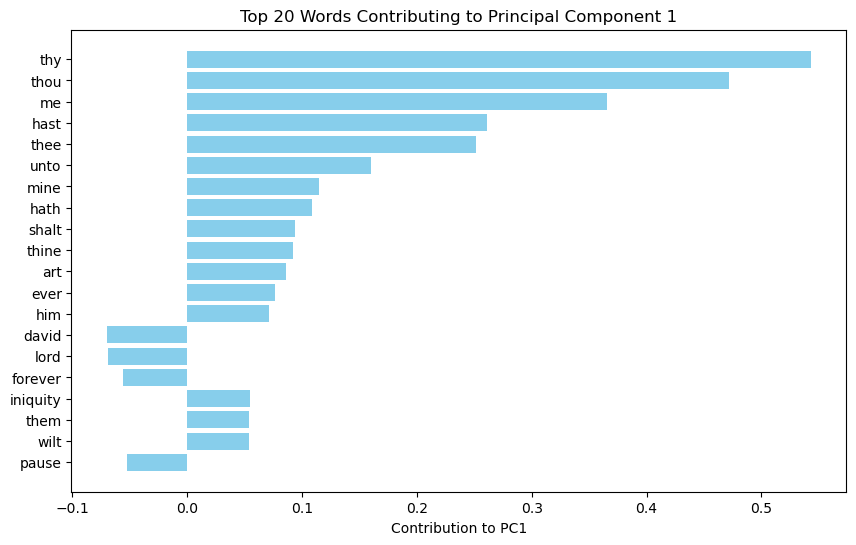

In [20]:
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the load directory where the pickle file is stored
load_dir = "../Data/pickles/"

# Load the TF-IDF vectorizer
vectorizer_path = os.path.join(load_dir, "psalms_tfidf_vectorizer.pickle")
with open(vectorizer_path, "rb") as file:
    psalm_vectorizer = pickle.load(file)

# Load the TF-IDF matrix
tfidf_matrix_path = os.path.join(load_dir, "psalms_tfidf_matrix.pickle")
with open(tfidf_matrix_path, "rb") as file:
    tfidf_matrix = pickle.load(file)


pca = PCA(n_components=2)
# Fit PCA on the TF-IDF matrix (convert DataFrame to NumPy array)
tfidf_pca = pca.fit_transform(tfidf_matrix.values)

# Define number of top words to retrieve
n = 20

# Get the words (terms) from your TF-IDF vectorizer
words = psalm_vectorizer.get_feature_names_out()

# Get the loadings of the first principal component
pc1_loadings = pca.components_[0]
word_loadings_pc1 = [(word, load) for word, load in zip(words, pc1_loadings)]
sorted_word_loadings_pc1 = sorted(word_loadings_pc1, key=lambda x: abs(x[1]), reverse=True)

# Print and extract top contributing words for PC1
top_words_pc1 = sorted_word_loadings_pc1[:n]
print("Top 10 words contributing to PC1:", top_words_pc1)

# Get the loadings of the second principal component
pc2_loadings = pca.components_[1]
word_loadings_pc2 = [(word, load) for word, load in zip(words, pc2_loadings)]
sorted_word_loadings_pc2 = sorted(word_loadings_pc2, key=lambda x: abs(x[1]), reverse=True)

# Print and extract top contributing words for PC2
top_words_pc2 = sorted_word_loadings_pc2[:n]
print("Top 10 words contributing to PC2:", top_words_pc2)

# Split the list into words and corresponding contributions for PC1
words_pc1, contributions_pc1 = zip(*top_words_pc1)

# Plot the most influential words for PC1
plt.figure(figsize=(10, 6))
plt.barh(words_pc1, contributions_pc1, color='skyblue')
plt.xlabel('Contribution to PC1')
plt.title(f'Top {n} Words Contributing to Principal Component 1')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest contribution at the top
plt.show()


From the graph above I see there are a few typos. lets fix them 

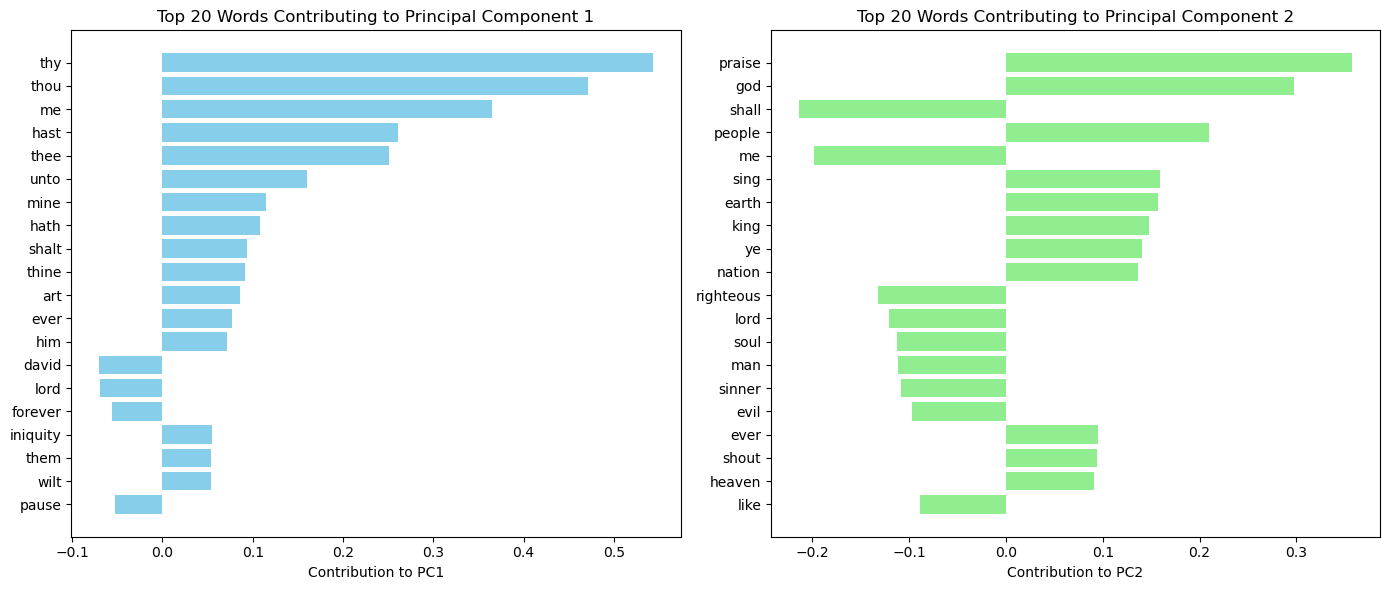

In [22]:
import matplotlib.pyplot as plt

# Split the lists into words and corresponding contributions for PC1 and PC2
words_pc1, contributions_pc1 = zip(*top_words_pc1)
words_pc2, contributions_pc2 = zip(*top_words_pc2)

# Create a figure with two subplots, one for PC1 and one for PC2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for PC1
ax1.barh(words_pc1, contributions_pc1, color='skyblue')
ax1.set_xlabel('Contribution to PC1')
ax1.set_title(f'Top {n} Words Contributing to Principal Component 1')
ax1.invert_yaxis()  # Invert y-axis to show the highest contribution at the top

# Plot for PC2
ax2.barh(words_pc2, contributions_pc2, color='lightgreen')
ax2.set_xlabel('Contribution to PC2')
ax2.set_title(f'Top {n} Words Contributing to Principal Component 2')
ax2.invert_yaxis()  # Invert y-axis to show the highest contribution at the top

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [23]:
# Converting the words to dataframe for further eaminations
pc1_df = pd.DataFrame(top_words_pc1, columns=['Word', 'Contribution_PC1'])

pc2_df = pd.DataFrame(top_words_pc2, columns=['Word', 'Contribution_PC2'])

pc1_df

,Word,Contribution_PC1
0,thy,0.543326
1,thou,0.471955
2,me,0.365422
3,hast,0.260693
4,thee,0.251114
5,unto,0.159908
6,mine,0.114503
7,hath,0.108396
8,shalt,0.093403
9,thine,0.091854


In [24]:
pc2_df

,Word,Contribution_PC2
0,praise,0.357889
1,god,0.298051
2,shall,-0.214291
3,people,0.210135
4,me,-0.198325
5,sing,0.159546
6,earth,0.157253
7,king,0.147527
8,ye,0.140912
9,nation,0.136180


In [28]:
# Merge the two DataFrames on the 'Word' column to find the intersection
pc1_pc2 = pd.merge(pc1_df[['Word', 'Contribution_PC1']], pc2_df[['Word', 'Contribution_PC2']], on='Word')

# Display the intersection DataFrame
print("Intersection of PC1 and PC2 DataFrames with Scores:")
pc1_pc2

Intersection of PC1 and PC2 DataFrames with Scores:


,Word,Contribution_PC1,Contribution_PC2
0,me,0.365422,-0.198325
1,ever,0.076665,0.095412
2,lord,-0.069205,-0.120570


### Doing some Sentiment analysis


In [30]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [31]:
from textblob import TextBlob


# Function to get the sentiment of a word
def get_sentiment(word):
    blob = TextBlob(word)
    return round(blob.sentiment.polarity, 6)  # Returns the polarity score

# Apply sentiment analysis to the 'Word' column and create a new 'Sentiment' column
pc1_df['Sentiment'] = pc1_df['Word'].apply(get_sentiment)

# Display the DataFrame with sentiment scores
pc1_df

,Word,Contribution_PC1,Sentiment
0,thy,0.543326,0.0
1,thou,0.471955,0.0
2,me,0.365422,0.0
3,hast,0.260693,0.0
4,thee,0.251114,0.0
5,unto,0.159908,0.0
6,mine,0.114503,0.0
7,hath,0.108396,0.0
8,shalt,0.093403,0.0
9,thine,0.091854,0.0


In [34]:
top_words_pc1

[('thy', 0.5433261434732051),
 ('thou', 0.4719547335307913),
 ('me', 0.36542239725652764),
 ('hast', 0.2606928256703807),
 ('thee', 0.2511138729009911),
 ('unto', 0.15990780292962856),
 ('mine', 0.11450264636082644),
 ('hath', 0.10839611418956117),
 ('shalt', 0.09340273965498345),
 ('thine', 0.09185360774897737),
 ('art', 0.08607861481204311),
 ('ever', 0.07666482085416547),
 ('him', 0.07103586322512827),
 ('david', -0.0701459113524968),
 ('lord', -0.06920540566571293),
 ('forever', -0.05565631920010515),
 ('iniquity', 0.054840232888275664),
 ('them', 0.054026099609877185),
 ('wilt', 0.053699882627254336),
 ('pause', -0.05252964988538367)]

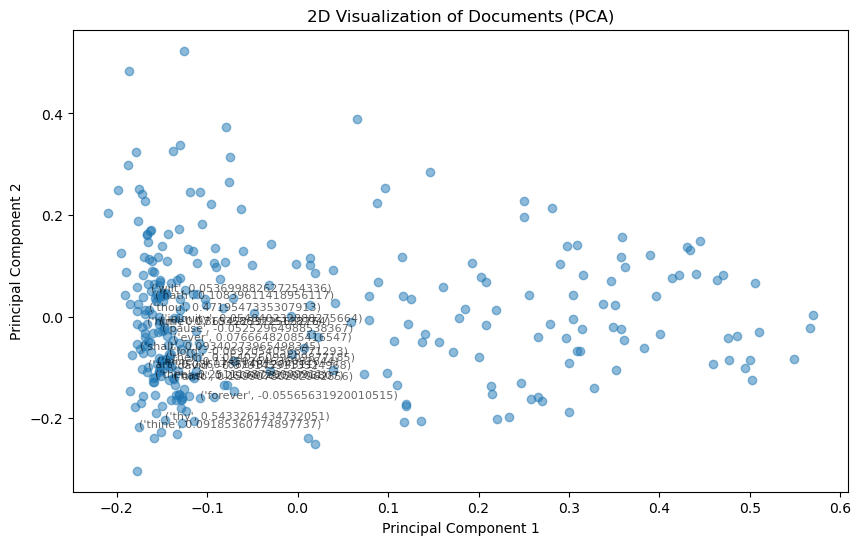

In [37]:
# Scatter plot of documents in the PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], alpha=0.5)

documents = top_words_pc1

# Optionally, label the points with document indices or titles
for i, txt in enumerate(documents):  # 'documents' is a list of document names/titles
    plt.annotate(txt, (tfidf_pca[i, 0], tfidf_pca[i, 1]), fontsize=8, alpha=0.6)

plt.title('2D Visualization of Documents (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [39]:
tfidf_pca

array([[-0.14680064, -0.20263967],
       [-0.16410104,  0.01314454],
       [-0.15339857, -0.01374985],
       [-0.13744365, -0.12044152],
       [-0.15772075, -0.11870794],
       [-0.1360322 , -0.12247763],
       [-0.1557668 , -0.09332727],
       [-0.15774431,  0.03691968],
       [-0.17400466, -0.06291018],
       [-0.17477665, -0.21672617],
       [-0.16564411, -0.09836414],
       [-0.13778802, -0.04539503],
       [-0.16692735, -0.01384782],
       [-0.14068244, -0.10130003],
       [-0.14220083, -0.07269626],
       [-0.10832608, -0.16014749],
       [-0.15220782, -0.00959631],
       [-0.14660873, -0.08448273],
       [-0.16184368,  0.05097129],
       [-0.15017597, -0.02875447],
       [-0.14386654, -0.03790012],
       [-0.11399091, -0.12035624],
       [-0.16501199,  0.06493127],
       [-0.12577174, -0.14306563],
       [-0.15016321, -0.10570037],
       [-0.12809491, -0.16155578],
       [-0.15109421, -0.08803826],
       [-0.16871127, -0.04091817],
       [-0.16072576,

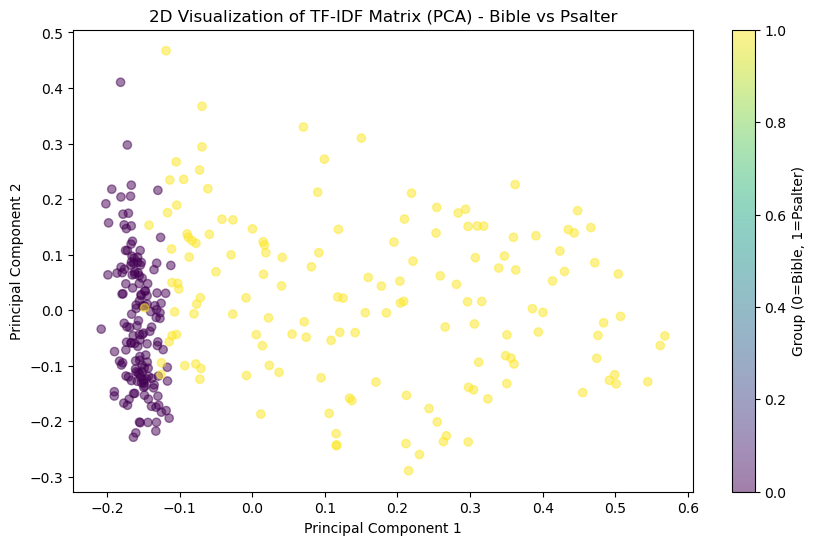

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure tfidf is a NumPy array before applying PCA
tfidf_matrix = tfidf.values if hasattr(tfidf, "values") else tfidf.toarray()

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf_matrix)

# Assuming you have a list of documents corresponding to the rows in the TF-IDF matrix
documents = tfidf.index if hasattr(tfidf, "index") else range(len(tfidf_matrix))

# Create a list for colors, where 0 = Bible and 1 = Psalter
colors = [0 if i < 151 else 1 for i in range(len(documents))]

# Plot the reduced 2D data with color based on the group (Bible/Psalter)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=colors, cmap='viridis', alpha=0.5)

# Add color bar to show the group mapping
plt.colorbar(scatter, label='Group (0=Bible, 1=Psalter)')

'''
# Optionally, label the points with the document names (if desired)
for i, txt in enumerate(documents):
    plt.annotate(txt, (reduced_matrix[i, 0], reduced_matrix[i, 1]), fontsize=8, alpha=0.6)
'''

plt.title('2D Visualization of TF-IDF Matrix (PCA) - Bible vs Psalter')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


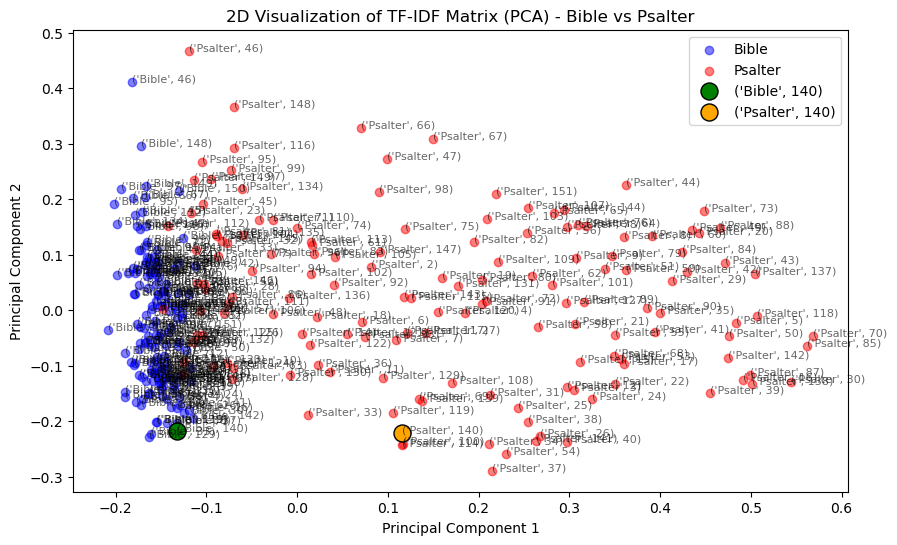

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf)

# Assuming you have a list of documents corresponding to the rows in the TF-IDF matrix
documents = tfidf.index

# Create a list for colors, where 0 = bible and 1 = psalter
colors = [0 if i < 151 else 1 for i in range(len(documents))]

# Define colors for bible and psalter
bible_color = 'blue'
psalter_color = 'red'

# Plot the reduced 2D data with color based on the group (bible/psalter)
plt.figure(figsize=(10, 6))

# Plot Bible documents (first 151, color blue)
plt.scatter(reduced_matrix[:151, 0], reduced_matrix[:151, 1], color=bible_color, alpha=0.5, label='Bible')

# Plot Psalter documents (last 150, color red)
plt.scatter(reduced_matrix[151:, 0], reduced_matrix[151:, 1], color=psalter_color, alpha=0.5, label='Psalter')


# Highlight specific points (e.g., Bible at index 140 and Psalter at index 140)
highlight_indices = [139, 139 + 151]  # Index 140 for Bible and 140 for Psalter (adjusted)
highlight_colors = ['green', 'orange']  # Different colors for these points

# Plot highlighted points as circles
for idx, color in zip(highlight_indices, highlight_colors):
    plt.scatter(reduced_matrix[idx, 0], reduced_matrix[idx, 1], color=color, edgecolor='black', s=150, label=f"{documents[idx]}")

# Add legend to show which color represents which group
plt.legend()

# Optionally, label the points with the document names (if desired)
for i, txt in enumerate(documents):
    plt.annotate(txt, (reduced_matrix[i, 0], reduced_matrix[i, 1]), fontsize=8, alpha=0.6)

plt.title('2D Visualization of TF-IDF Matrix (PCA) - Bible vs Psalter')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


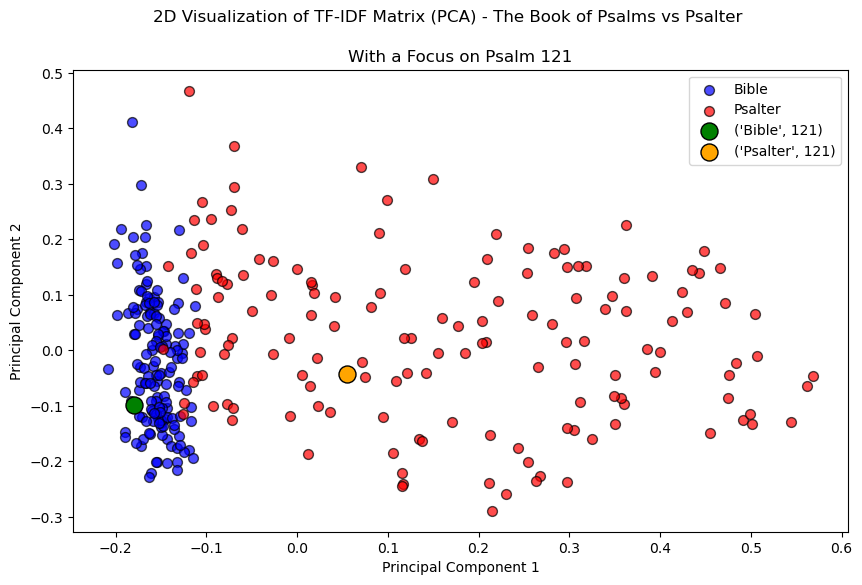

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf)

# Assuming you have a list of documents corresponding to the rows in the TF-IDF matrix
documents = tfidf.index

# Create a list for colors, where 0 = bible and 1 = psalter
colors = [0 if i < 151 else 1 for i in range(len(documents))]

# Define colors for bible and psalter
bible_color = 'blue'
psalter_color = 'red'

# Plot the reduced 2D data with color based on the group (bible/psalter)
plt.figure(figsize=(10, 6))

# Plot Bible documents (first 151, color blue)
plt.scatter(reduced_matrix[:151, 0], reduced_matrix[:151, 1], color=bible_color, alpha=0.7, label='Bible', marker='o', edgecolor='black', s=50)

# Plot Psalter documents (last 150, color red)
plt.scatter(reduced_matrix[151:, 0], reduced_matrix[151:, 1], color=psalter_color, alpha=0.7, label='Psalter', marker='o', edgecolor='black', s=50)

target_psalm = 121
try:
    # Highlight specific points (e.g., Bible at index 140 and Psalter at index 140)
    highlight_indices = [target_psalm-1, target_psalm-1 + 151]  # Index 140 for Bible and 140 for Psalter (adjusted)
    highlight_colors = ['green', 'orange']  # Different colors for these points

    # Plot highlighted points as circles
    for idx, color in zip(highlight_indices, highlight_colors):
        plt.scatter(reduced_matrix[idx, 0], reduced_matrix[idx, 1], color=color, edgecolor='black', s=150, label=f"{documents[idx]}")

except IndexError as e:
    print(f"Index error at i={i}: {e} \nThere is no Pslater Psaslm 151 to compare to. ")


# Add legend to show which color represents which group
plt.legend()

'''# Optionally, label the points with the document names (if desired)
for i, txt in enumerate(documents):
    plt.annotate(txt, (reduced_matrix[i, 0], reduced_matrix[i, 1]), fontsize=8, alpha=0.6)
'''
plt.suptitle('2D Visualization of TF-IDF Matrix (PCA) - The Book of Psalms vs Psalter')
plt.title(f'With a Focus on Psalm {target_psalm}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


New graph to index to show a list of psalms

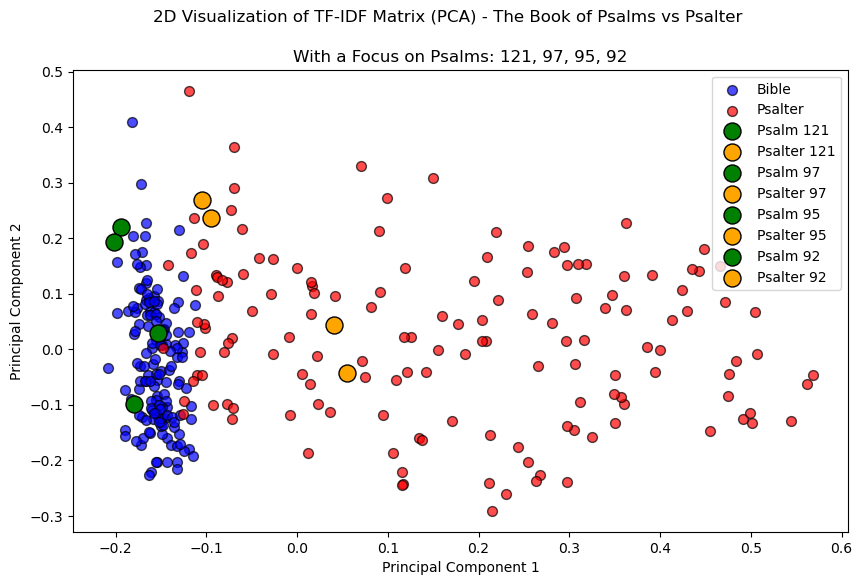

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf)

# Assuming you have a list of documents corresponding to the rows in the TF-IDF matrix
documents = tfidf.index

# Define colors for Bible and Psalter
bible_color = 'blue'
psalter_color = 'red'

# Plot the reduced 2D data with color based on the group (Bible/Psalter)
plt.figure(figsize=(10, 6))

# Plot Bible documents (first 151, color blue)
plt.scatter(reduced_matrix[:151, 0], reduced_matrix[:151, 1], 
            color=bible_color, alpha=0.7, label='Bible', marker='o', 
            edgecolor='black', s=50)

# Plot Psalter documents (last 150, color red)
plt.scatter(reduced_matrix[151:, 0], reduced_matrix[151:, 1], 
            color=psalter_color, alpha=0.7, label='Psalter', marker='o', 
            edgecolor='black', s=50)

# List of target Psalms to highlight
target_psalms = [121, 97, 95, 92]

# Colors for Bible and Psalter highlights
highlight_colors = ['green', 'orange']

try:
    for psalm in target_psalms:
        highlight_indices = [psalm - 1, psalm - 1 + 151]  # Adjusted indices

        for idx, color in zip(highlight_indices, highlight_colors):
            if 0 <= idx < len(reduced_matrix):  # Ensure valid index
                plt.scatter(reduced_matrix[idx, 0], reduced_matrix[idx, 1], 
                            color=color, edgecolor='black', s=150, 
                            label=f"Psalm {psalm}" if color == 'green' else f"Psalter {psalm}")
            else:
                print(f"Index error for Psalm {psalm}: No corresponding Psalter Psalm.")

except IndexError as e:
    print(f"Unexpected index error: {e}")

# Add legend (avoid duplicate labels)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())

# Titles and labels
plt.suptitle('2D Visualization of TF-IDF Matrix (PCA) - The Book of Psalms vs Psalter')
plt.title(f'With a Focus on Psalms: {", ".join(map(str, target_psalms))}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show plot
plt.show()


In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

def graph_pca(query, psalms):
    # Apply PCA to reduce dimensions to 2D
    pca = PCA(n_components=2)
    reduced_matrix = pca.fit_transform(tfidf)

    # Assuming you have a list of documents corresponding to the rows in the TF-IDF matrix
    documents = tfidf.index

    # Define colors for Bible and Psalter
    bible_color = 'blue'
    psalter_color = 'red'

    # Plot the reduced 2D data with color based on the group (Bible/Psalter)
    plt.figure(figsize=(10, 6))

    # Plot Bible documents (first 151, color blue)
    plt.scatter(reduced_matrix[:151, 0], reduced_matrix[:151, 1], 
                color=bible_color, alpha=0.7, label='Bible', marker='o', 
                edgecolor='black', s=50)

    # Plot Psalter documents (last 150, color red)
    plt.scatter(reduced_matrix[151:, 0], reduced_matrix[151:, 1], 
                color=psalter_color, alpha=0.7, label='Psalter', marker='o', 
                edgecolor='black', s=50)

    # List of target Psalms to highlight
    target_psalms = psalms

    # Colors for Bible and Psalter highlights
    highlight_colors = ['green', 'orange']
    edge_colors = ['black', 'purple', 'cyan', 'magenta']  # Unique edge colors

    try:
        for idx, psalm in enumerate(target_psalms):
            highlight_indices = [psalm - 1, psalm - 1 + 151]  # Adjusted indices
            edge_color = edge_colors[idx % len(edge_colors)]  # Cycle through edge colors

            for i, (highlight_idx, color) in enumerate(zip(highlight_indices, highlight_colors)):
                if 0 <= highlight_idx < len(reduced_matrix):  # Ensure valid index
                    plt.scatter(reduced_matrix[highlight_idx, 0], reduced_matrix[highlight_idx, 1], 
                                color=color, s=350, linewidth=2,
                                label=f"Psalm {psalm}" if i == 0 else f"Psalter {psalm}")

                    # adding the psalms number within the specific circle
                    plt.text(reduced_matrix[highlight_idx, 0], reduced_matrix[highlight_idx, 1], 
                             str(psalm), fontsize=10, fontweight='bold', ha='center', va='center',
                             color='white' if color == 'green' else 'black')
                else:
                    print(f"Index error for Psalm {psalm}: No corresponding Psalter Psalm.")

    except IndexError as e:
        print(f"Unexpected index error: {e}")

    # Add legend (avoid duplicate labels)
    bible_legend = mlines.Line2D([], [], color=bible_color, marker='o', markersize=10, label="Bible")
    psalter_legend = mlines.Line2D([], [], color=psalter_color, marker='o', markersize=10, label="Psalter")
    highlighted_bible_legend = mlines.Line2D([], [], color='green', marker='o', markersize=10, label="Highlighted Bible Psalms")
    highlighted_psalter_legend = mlines.Line2D([], [], color='orange', marker='o', markersize=10, label="Highlighted Psalter Psalms")

    # adding custom legend
    plt.legend(handles=[bible_legend, psalter_legend, highlighted_bible_legend, highlighted_psalter_legend])

    # Titles and labels
    plt.suptitle('2D Visualization of TF-IDF Matrix (PCA) - The Book of Psalms vs Psalter')

    # Fixed the string formatting for multi-line title
    plt.title(f"$\mathbf{{Searching\ for\:}}$ '{query}'.\nFocus on Psalms in Order of Results: {', '.join(map(str, target_psalms))}")

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Show plot
    plt.show()


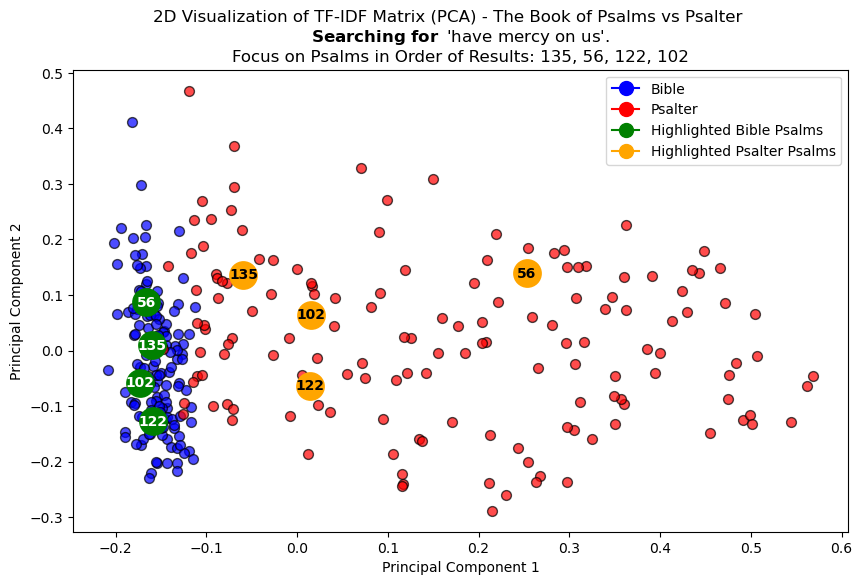

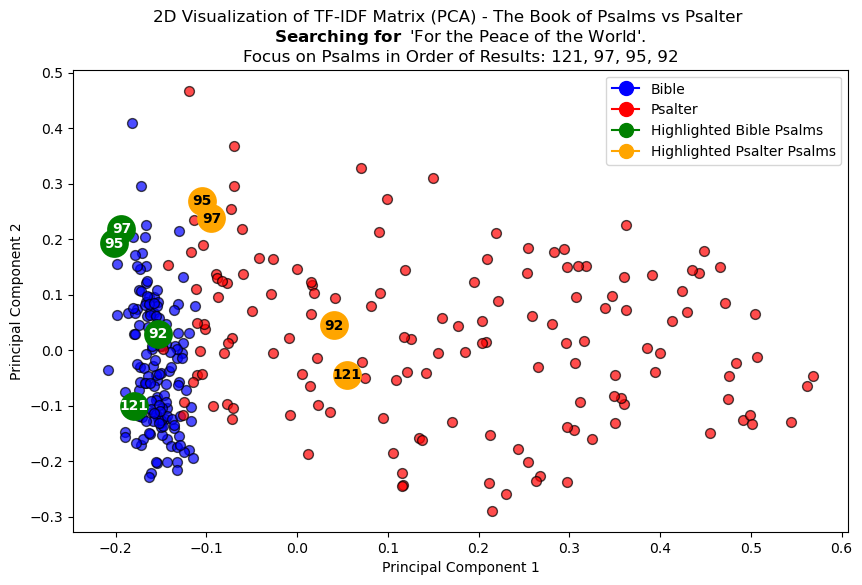

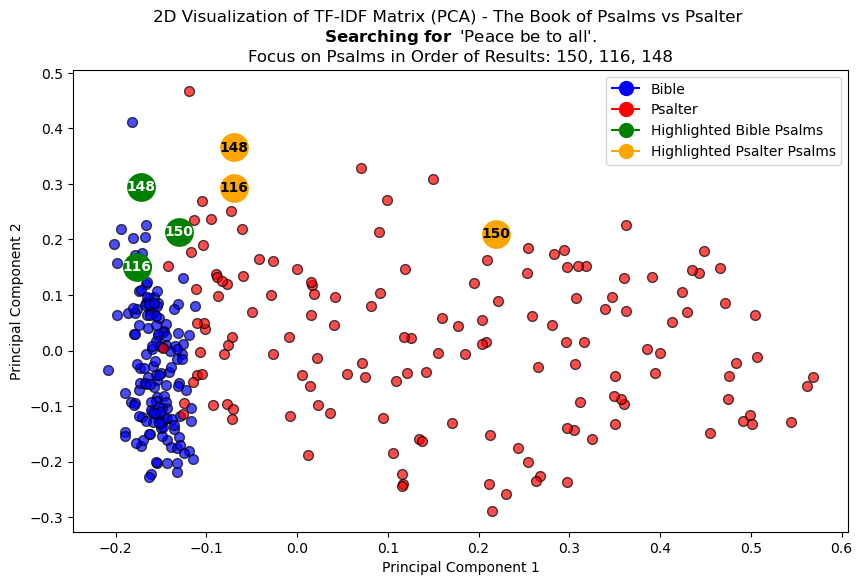

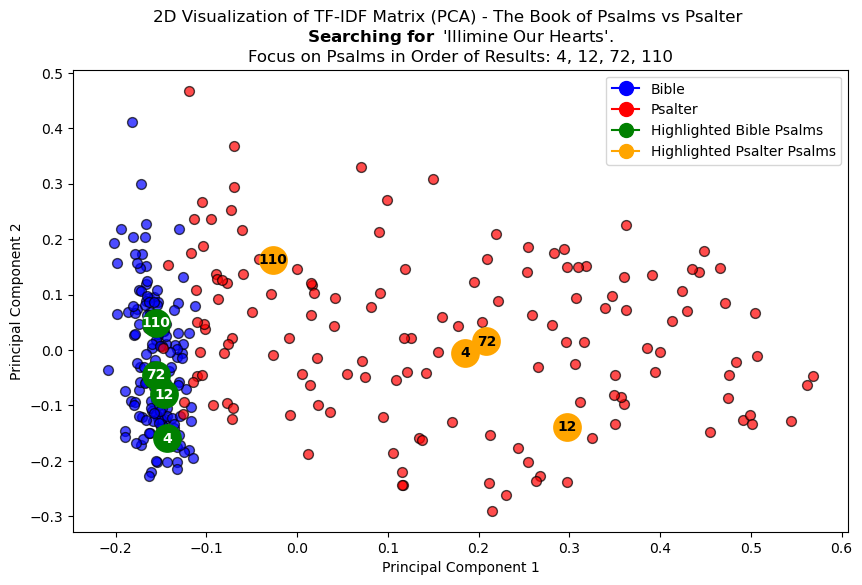

In [47]:
graph_pca("have mercy on us", [135, 56, 122, 102])

graph_pca("For the Peace of the World", [121, 97, 95, 92])

graph_pca("Peace be to all", [150, 116, 148])

graph_pca("Illimine Our Hearts", [4,12,72,110])

Calulate the distance between the points of the same psalm and then graph distances based on the length of the psalm. 

Once this is done, compare with a search like before **"For the peace of the World"**


integrate this into the search function and have it plot the top psalms found.

amkje the size be based on the cosin similarity

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

def graph_pca(query, psalms):
    # Apply PCA to reduce dimensions to 2D
    pca = PCA(n_components=2)
    reduced_matrix = pca.fit_transform(tfidf)

    # Assuming you have a list of documents corresponding to the rows in the TF-IDF matrix
    documents = tfidf.index

    # Define colors for Bible and Psalter
    bible_color = 'blue'
    psalter_color = 'red'

    # Plot the reduced 2D data with color based on the group (Bible/Psalter)
    plt.figure(figsize=(12, 6))

    # Plot Bible documents (first 151, color blue)
    plt.scatter(reduced_matrix[:151, 0], reduced_matrix[:151, 1], 
                color=bible_color, alpha=0.7, label='Bible', marker='o', 
                edgecolor='black', s=50)

    # Plot Psalter documents (last 150, color red)
    plt.scatter(reduced_matrix[151:, 0], reduced_matrix[151:, 1], 
                color=psalter_color, alpha=0.7, label='Psalter', marker='o', 
                edgecolor='black', s=50)
    
    # bin for the given Pslams to put in the graph title
    target_psalms = []
    
    try:
        for psalm, doc in psalms:
            # Recording the Psalm Number
            target_psalms.append(psalm)
            
            # Determining the docmunt of the given psalm
            if doc == "Bible":
                highlight_index = psalm - 1  
                color = 'green'
            elif doc == "Psalter":
                highlight_index = (psalm - 1) + 151 
                color = 'orange'

            if 0 <= highlight_index < len(reduced_matrix):  # Ensure valid index
                plt.scatter(reduced_matrix[highlight_index, 0], reduced_matrix[highlight_index, 1], 
                            color=color, edgecolor='black', 
                            s=350, label=f"{doc} Psalm {psalm}")

                # Adding the psalm number within the specific circle
                plt.text(reduced_matrix[highlight_index, 0], reduced_matrix[highlight_index, 1], 
                         str(psalm), fontsize=10, fontweight='bold', ha='center', va='center',
                         color='white' if color == 'green' else 'black')

            else:
                print(f"Index error for Psalm {psalm}: No corresponding Psalter Psalm.")

    except IndexError as e:
        print(f"Unexpected index error: {e}")


    # Add legend (avoid duplicate labels)
    bible_legend = mlines.Line2D([], [], color=bible_color, marker='o', markersize=10, label="Bible")
    psalter_legend = mlines.Line2D([], [], color=psalter_color, marker='o', markersize=10, label="Psalter")
    highlighted_bible_legend = mlines.Line2D([], [], color='green', marker='o', markersize=10, label="Highlighted Bible")
    highlighted_psalter_legend = mlines.Line2D([], [], color='orange', marker='o', markersize=10, label="Highlighted Psalter")

    # adding custom legend
    plt.legend(handles=[bible_legend, psalter_legend, highlighted_bible_legend, highlighted_psalter_legend])

    # Titles and labels
    plt.suptitle('2D Visualization of TF-IDF Matrix (PCA) - The Book of Psalms vs Psalter')

    # Fixed the string formatting for multi-line title
    plt.title(f"$\mathbf{{Searching\ for\:}}$ '{query}'.\nFocus on Psalms in Order of Results: {', '.join(map(str, target_psalms))}")

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Show plot
    plt.show()

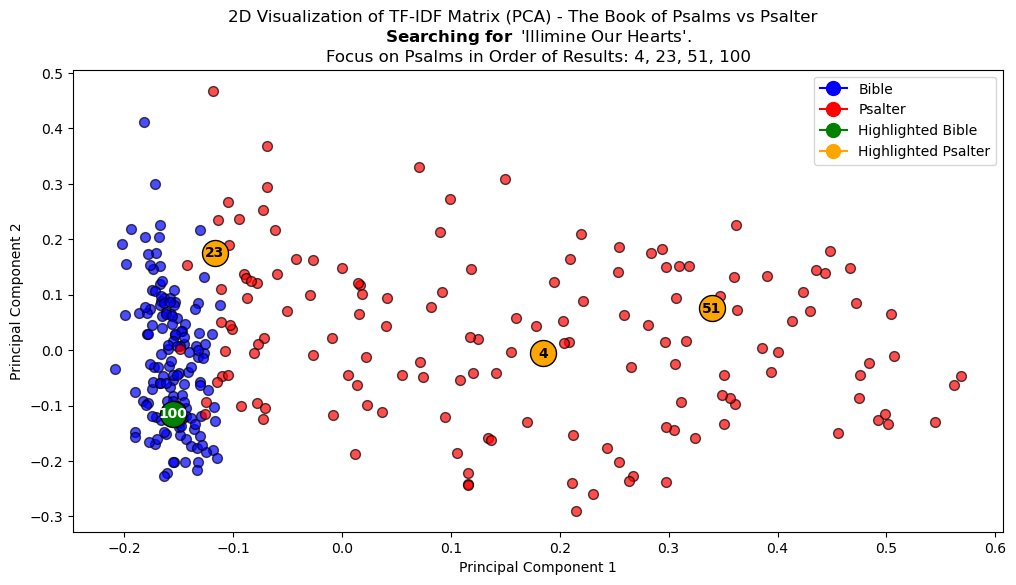

In [49]:
graph_pca("Illimine Our Hearts", [(4, "Psalter"), (23, "Psalter"), (51, "Psalter"), (100, "Bible")])

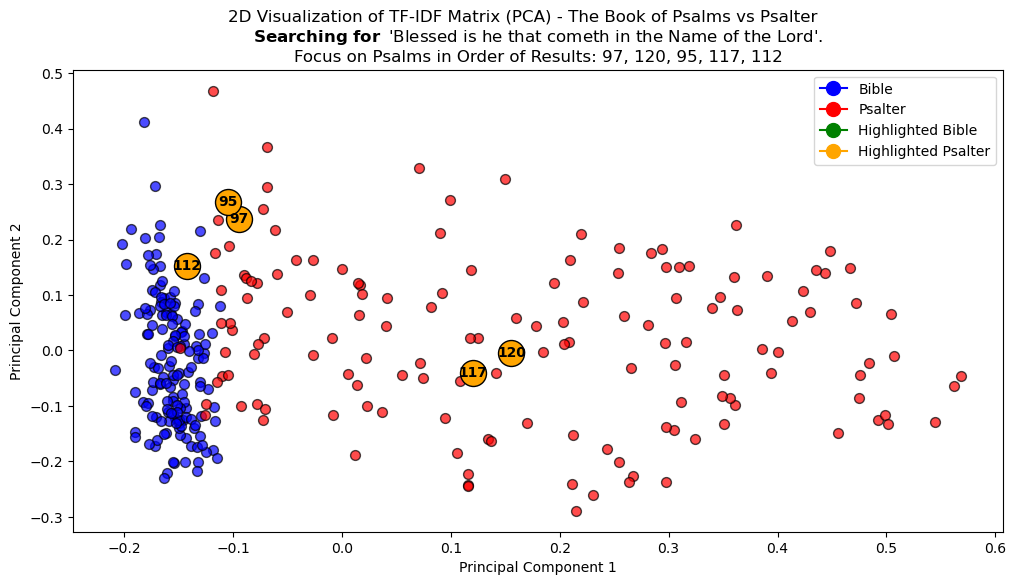

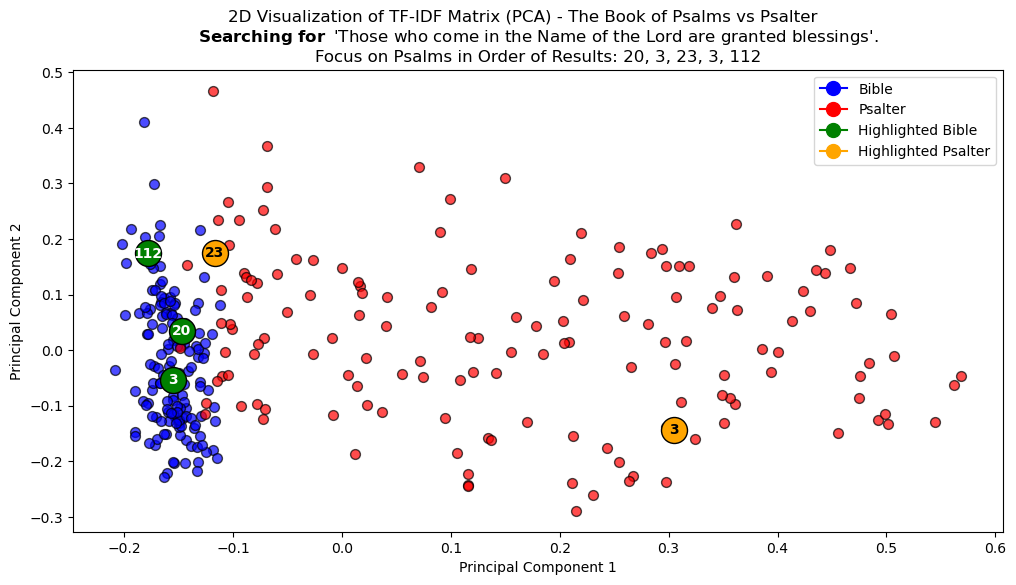

In [50]:
graph_pca("Blessed is he that cometh in the Name of the Lord", [(97, "Psalter"), (120, "Psalter"), (95, "Psalter"), (117, "Psalter"), (112, "Psalter")])

graph_pca("Those who come in the Name of the Lord are granted blessings", [(20, "Bible"), (3, "Psalter"), (23, "Psalter"), (3, "Bible"), (112, "Bible")])

In [51]:
target_psalm = 90
# Highlight specific points (e.g., Bible at index 140 and Psalter at index 140)
highlight_indices = [target_psalm-1, target_psalm-1 + 151]

# Storage for the distances 
dist = []

# Loop through each Psalm index (assuming first 151 are Bible and last 150 are Psalter)
for i in range(150):  
    try:
        bible_coords = reduced_matrix[i]        # Bible version
        psalter_coords = reduced_matrix[i + 151]  # Corresponding Psalter version

        # Compute Euclidean distance
        distance = np.linalg.norm(bible_coords - psalter_coords)

        # Append data (Psalm Name, Distance)
        dist.append([i+1, distance])

    except IndexError as e:
        print(f"Index error at i={i}: {e} \nThere is no Pslater Psaslm 151 to compare to. ")


# adding distances to a dataframe
df_distances = pd.DataFrame(dist, columns=["Psalm", "Distance"])

# Setting Index to psalm number
df_distances.set_index("Psalm", inplace=True)

df_distances

,Distance
Psalm,
1,0.021359
2,0.243345
3,0.468200
4,0.361250
5,0.649901
...,...
146,0.063335
147,0.250382
148,0.122557


In [52]:
# accessing the psalms data
psalms = pd.read_csv("../Data/clean_psalm_verses.csv")

# defining the two texts
docs = ['Bible', 'Psalter']
# psalms.head()

target_bible = " ".join(psalms[(psalms['text'] == "Bible") & (psalms['psalm_num'] == 1)]['verse'])
target_psalter = " ".join(psalms[(psalms['text'] == "Psalter") & (psalms['psalm_num'] == 1)]['verse'])

# Debug statement
print(len(target_bible))
print(len(target_psalter))

# Compute the mean length
average_length = round((len(target_bible) + len(target_psalter)) / 2)
print(f"Mean Length: {average_length}")


653
716
Mean Length: 684


In [53]:
# defining the two texts
docs = ['Bible', 'Psalter']

# going through each text
for psalm in range(1, 151):
    target_bible = " ".join(psalms[(psalms['text'] == "Bible") & (psalms['psalm_num'] == psalm)]['verse'])
    target_psalter = " ".join(psalms[(psalms['text'] == "Psalter") & (psalms['psalm_num'] == psalm)]['verse'])

    # Compute the mean length and ensure it is an integer
    average_length = int(round((len(target_bible) + len(target_psalter)) / 2))

    # adding the mean length to the dist df
    df_distances.loc[psalm, 'length'] = round(average_length, 0)  

    
df_distances

,Distance,length
Psalm,,
1,0.021359,684.0
2,0.243345,1080.0
3,0.468200,712.0
4,0.361250,832.0
5,0.649901,1305.0
...,...,...
146,0.063335,956.0
147,0.250382,730.0
148,0.122557,1098.0


We are going to add the length of each psalm to the differences. and then graph this data to try to find any correlation.

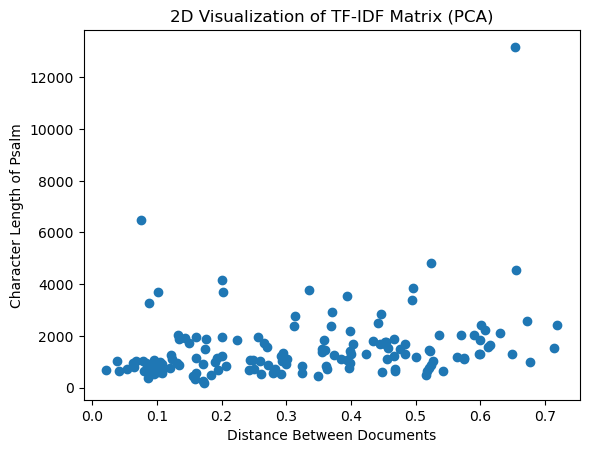

In [54]:

scatter = plt.scatter(df_distances['Distance'], df_distances['length'])


plt.title('2D Visualization of TF-IDF Matrix (PCA)')
plt.xlabel('Distance Between Documents')
plt.ylabel('Character Length of Psalm')
plt.show()


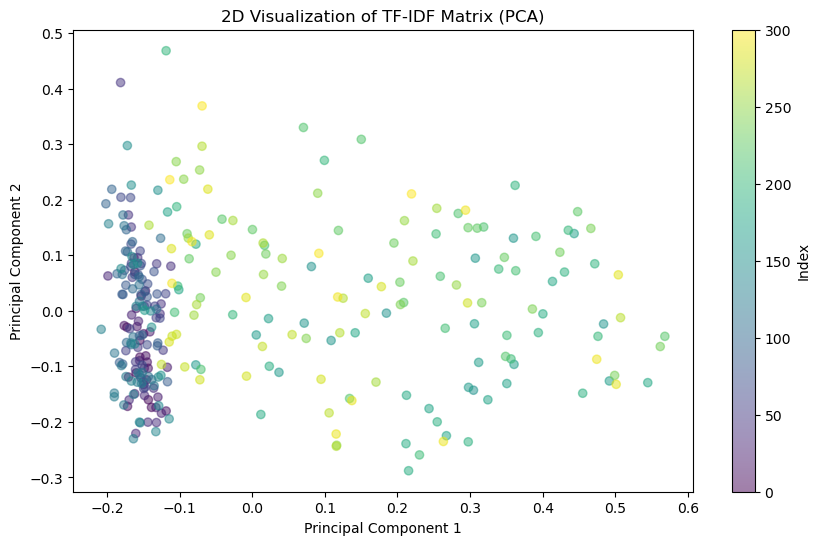

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf)

# Create an array of indices (e.g., for coloring)
indices = range(len(reduced_matrix))

# Plot the reduced 2D data with color based on the index of the matrix
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=indices, cmap='viridis', alpha=0.5)

# Add color bar to show the index scale
plt.colorbar(scatter, label='Index')

plt.title('2D Visualization of TF-IDF Matrix (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [56]:
!pip install wordcloud

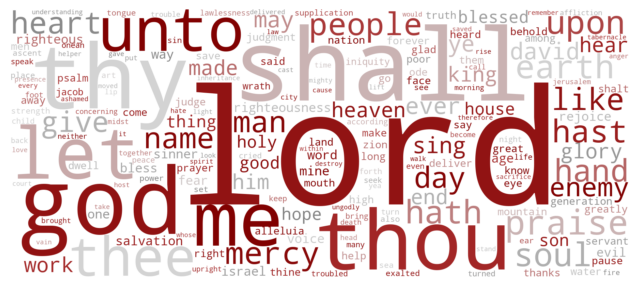

In [77]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Ensure the save directory exists
save_path = "../Data/top_words_wordcloud.jpeg"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Get the word importance (sum of TF-IDF scores across all documents)
word_importance = tfidf.sum(axis=0)

# Convert to dictionary (ensure proper summing if tfidf is a DataFrame)
if hasattr(word_importance, "A1"):  # If it's a sparse matrix, convert to array
    word_importance = word_importance.A1

word_dict = {word: word_importance[i] for i, word in enumerate(tfidf.columns)}

# Create a custom colormap (maroon-to-grey)
colors = ["#800000", "#A52A2A", "#D3D3D3", "#808080"]  # Dark maroon → brown → light grey → dark grey
custom_cmap = LinearSegmentedColormap.from_list("maroon_grey", colors, N=256)

# Generate word cloud with adjusted width and height for letter envelope ratio
wordcloud = WordCloud(
    width=1900,  # Wider to maintain readability
    height=820,  # Shorter to match the envelope ratio
    background_color='white',
    colormap=custom_cmap,  # Use custom colormap
    max_words=200,
    contour_color='black',
    contour_width=1,
    prefer_horizontal=1.0
).generate_from_frequencies(word_dict)

# Create the figure with letter envelope dimensions
plt.figure(figsize=(8, 4.5))  # Letter envelope size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Word Cloud of The Most Frequent Words in the Psalms')

# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


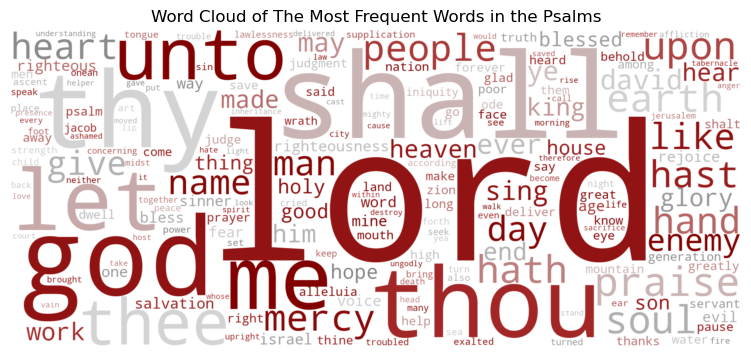

In [79]:
plt.figure(figsize=(19, 4.1))  # Significantly wider
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of The Most Frequent Words in the Psalms')

# Save the figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply KMeans clustering on the TF-IDF matrix
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf)

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf)

# Plot the clustered documents
plt.figure(figsize=(10, 6))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title(f'Document Clustering Visualization (KMeans, {num_clusters} Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()